In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.android', '.AndroidStudio3.5', '.conda', '.condarc', '.dia', '.eclipse', '.gitconfig', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jmc', '.jupyter', '.matplotlib', '.PyCharmCE2019.2', '3D Objects', '5_6091221931715985628.pdf', '5_6215187147578671288.pdf', 'anaconda3', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'debug.log', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'heart_disease.ipynb', 'IMG_20190725_083941_HHT.jpg', 'IMG_20190816_081041.jpg', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'MicrosoftEdgeBackups', 'model.pkl', 'model_pickle', 'model_pkl', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{ab5c9fdd-10b1-11eb-87ca-a382c7f468e4}.TM.blf', 'NTUSER.DAT{ab5c9fdd-10b1-11eb-87ca-a382c7f468e4}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{ab5c9fdd-10b1-11eb-87ca-a382c7f468e4}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'Pictures', 'PrintHood', 'PycharmProject', '

In [12]:
dataset = pd.read_csv("C:\\Users\\hp\\Desktop\\heart.csv")

In [13]:
type(dataset) #type of our dataset

pandas.core.frame.DataFrame

In [14]:
dataset.shape #shape of our dataset

(303, 14)

In [15]:
dataset.head(5) #print the 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0


In [17]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
dataset.info() #to find the null values in it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:

info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [20]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [21]:
dataset["target"].unique()#gives value 1 and 0 so it is an classification problem

array([1, 0], dtype=int64)

In [22]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


1    165
0    138
Name: target, dtype: int64


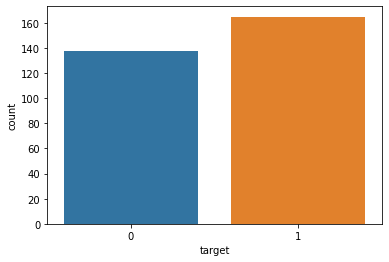

In [23]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [24]:

print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [25]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

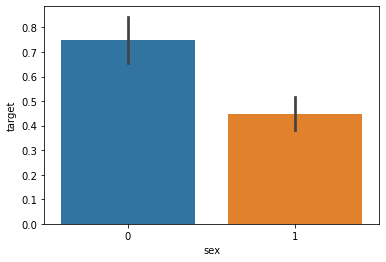

In [26]:
sns.barplot(dataset["sex"],y)

In [27]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

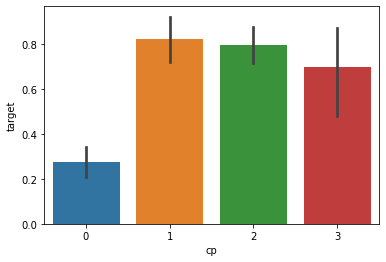

In [28]:
sns.barplot(dataset["cp"],y)

In [29]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [30]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

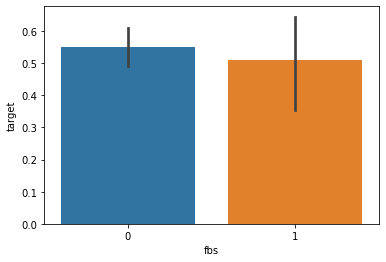

In [31]:
sns.barplot(dataset["fbs"],y)

In [32]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

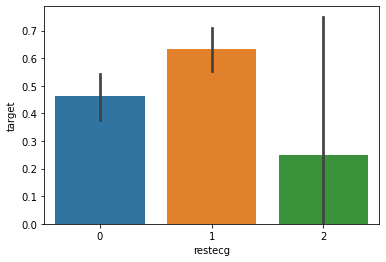

In [33]:
sns.barplot(dataset["restecg"],y)

In [34]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

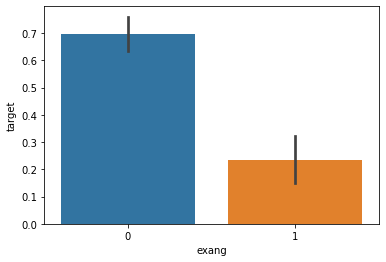

In [35]:
sns.barplot(dataset["exang"],y)

In [36]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

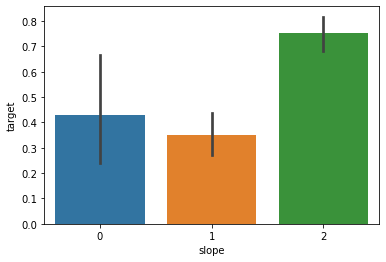

In [37]:
sns.barplot(dataset["slope"],y)

In [38]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

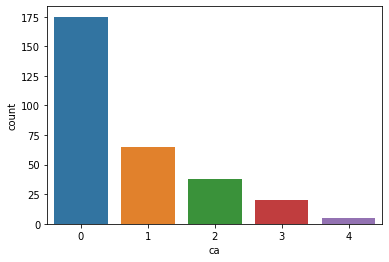

In [39]:
sns.countplot(dataset["ca"])

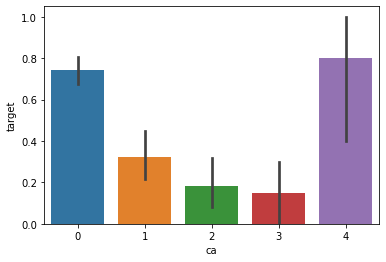

In [40]:
sns.barplot(dataset["ca"],y)

In [41]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

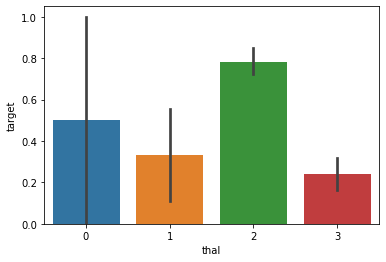

In [42]:
sns.barplot(dataset["thal"],y)

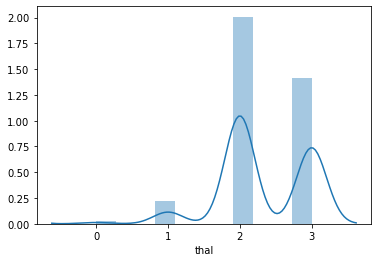

In [43]:
sns.distplot(dataset["thal"])

In [44]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [45]:
X_train.shape

(242, 13)

In [46]:
X_test.shape

(61, 13)

In [47]:
Y_train.shape

(242,)

In [48]:
Y_test.shape

(61,)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 83.47%
Test accuracy: 85.25%
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [52]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [53]:
from sklearn.metrics import confusion_matrix #confusion matrix of Naive Bayes

In [54]:
matrix= confusion_matrix(Y_test, y_pred_nb)

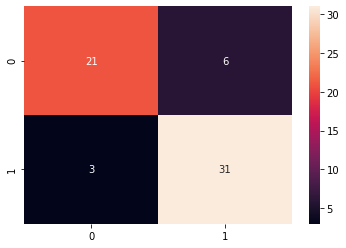

In [55]:
sns.heatmap(matrix,annot = True, fmt = "d")

In [56]:
import pickle

In [59]:
with open('model.pkl','wb') as file:
    pickle.dump(nb,file)

In [61]:
with open('model.pkl','rb') as f:
    Heart_disease_detector_model = pickle.load(f)

In [63]:
y_pred = Heart_disease_detector_model.predict(X_test)

In [67]:
print('Confusion matrix of Naive Bayes model: \n',confusion_matrix(Y_test, y_pred),'\n')

Confusion matrix of Naive Bayes model: 
 [[21  6]
 [ 3 31]] 



In [68]:
print('Accuracy of Naive Bayes  model = ',accuracy_score(Y_test, y_pred))

Accuracy of Naive Bayes  model =  0.8524590163934426
